In [85]:
import pandas as pd

# Load the dfset
df = pd.read_csv("../data/raw/bank/bank-full.csv",sep=";")

# Display first 5 rows
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [86]:
print(df.info())

print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
(45211, 17)


In [87]:
# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include=['object']))


                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [88]:
# Check the exact column names in the dataset
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [89]:
print(df['y'].unique())

['no' 'yes']


In [90]:
print(df['y'].unique())

# Now apply the conversion (yes -> 1, no -> 0)
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Check the first few rows to verify
print(df.head())

# Check unique values of 'y' to confirm successful conversion
print(df['y'].unique())


['no' 'yes']
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0  
[0 1]


### 1. Distribution of Target Variable (`y`)
We start by visualizing the distribution of the target variable `y`, which indicates whether a customer subscribed to the bank's service. This will give us an idea of the class distribution in the dataset (whether there's any imbalance between "subscribed" and "not subscribed").


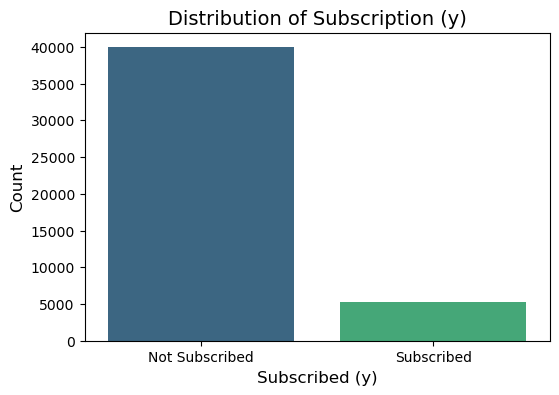

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target variable 'y'
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='viridis')
plt.title('Distribution of Subscription (y)', fontsize=14)
plt.xlabel('Subscribed (y)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Not Subscribed', 'Subscribed'])
plt.show()


### 2. Distribution of Numerical Features
Next, we visualize the distribution of key numerical features in the dataset, such as `age`, `balance`, and `duration`. Understanding the distribution of these variables is crucial for detecting outliers and better understanding the overall patterns in the data.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


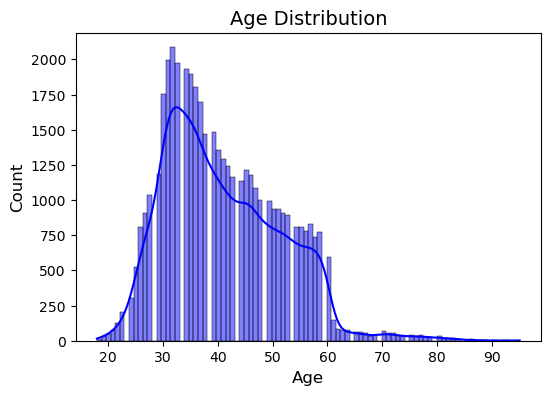

In [94]:
# Age distribution plot
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


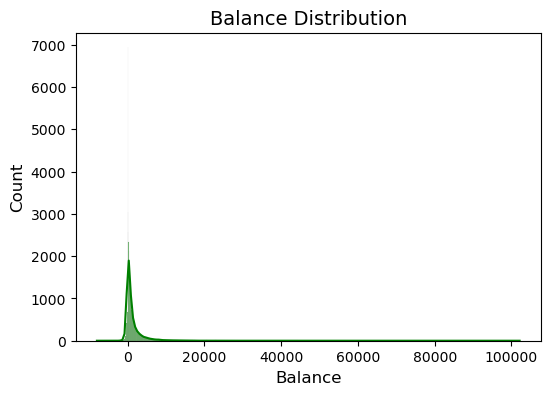

In [95]:
# Balance distribution plot
plt.figure(figsize=(6, 4))
sns.histplot(df['balance'], kde=True, color='green')
plt.title('Balance Distribution', fontsize=14)
plt.xlabel('Balance', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


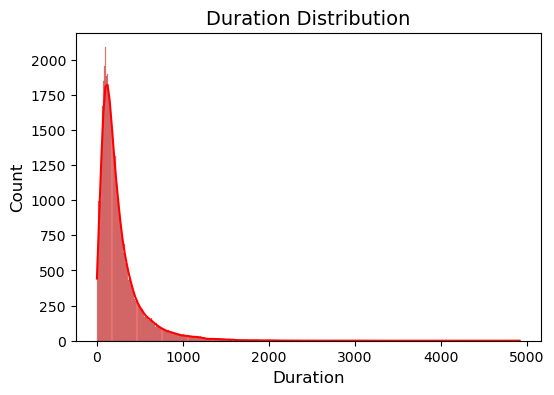

In [96]:
# Duration distribution plot
plt.figure(figsize=(6, 4))
sns.histplot(df['duration'], kde=True, color='red')
plt.title('Duration Distribution', fontsize=14)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


### 3. Boxplots to Compare Numerical Features with Subscription (y)
Boxplots are useful for comparing numerical features against the target variable `y`. By visualizing how the features like `age`, `balance`, and `duration` are distributed across the two classes of the target (subscribed vs not subscribed), we can identify potential patterns or outliers.


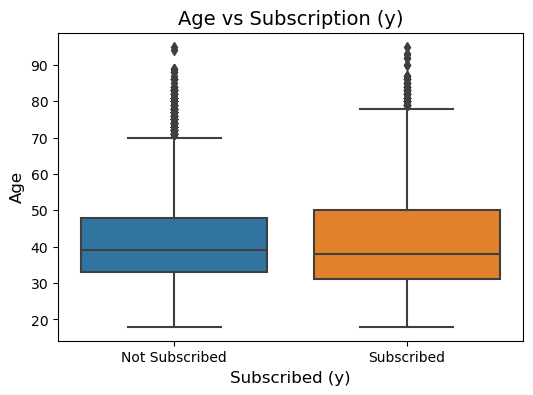

In [97]:
# Boxplot of Age vs Subscription (y)
plt.figure(figsize=(6, 4))
sns.boxplot(x='y', y='age', data=df)
plt.title('Age vs Subscription (y)', fontsize=14)
plt.xlabel('Subscribed (y)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks([0, 1], ['Not Subscribed', 'Subscribed'])
plt.show()


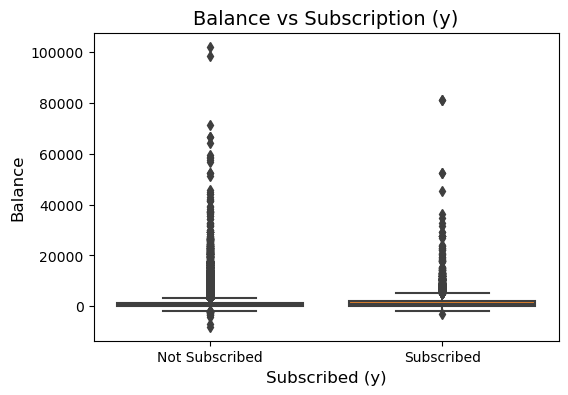

In [98]:
# Boxplot of Balance vs Subscription (y)
plt.figure(figsize=(6, 4))
sns.boxplot(x='y', y='balance', data=df)
plt.title('Balance vs Subscription (y)', fontsize=14)
plt.xlabel('Subscribed (y)', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.xticks([0, 1], ['Not Subscribed', 'Subscribed'])
plt.show()


### 4. Correlation Heatmap
A correlation heatmap helps us visualize the relationships between numerical features in the dataset. It shows how strongly each pair of features is correlated with each other, which can be valuable when selecting features for machine learning models.


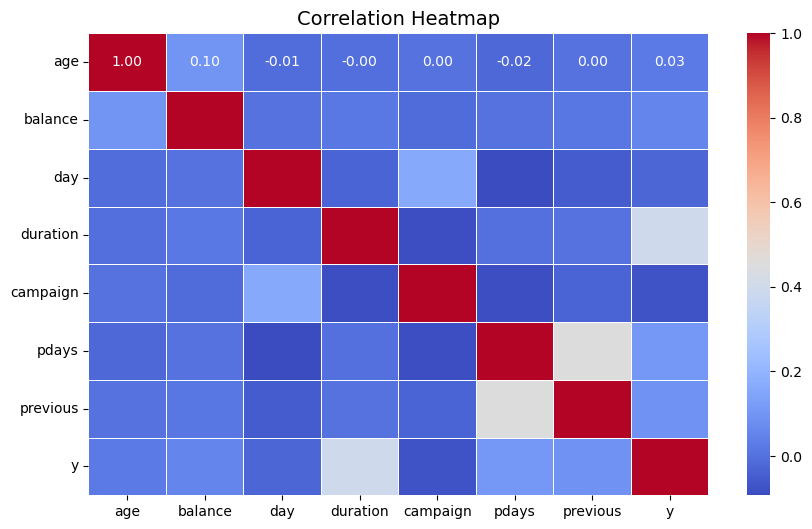

In [101]:
# Select only the numerical columns from the dataframe
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix only for numerical columns
corr = df[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


### 5. Pairplot: Exploring Relationships Between Numerical Features
A pairplot is a great way to visually explore the relationships between multiple numerical features at once. It displays scatter plots for every pair of numerical columns and allows us to understand how these features relate to the target variable `y`.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

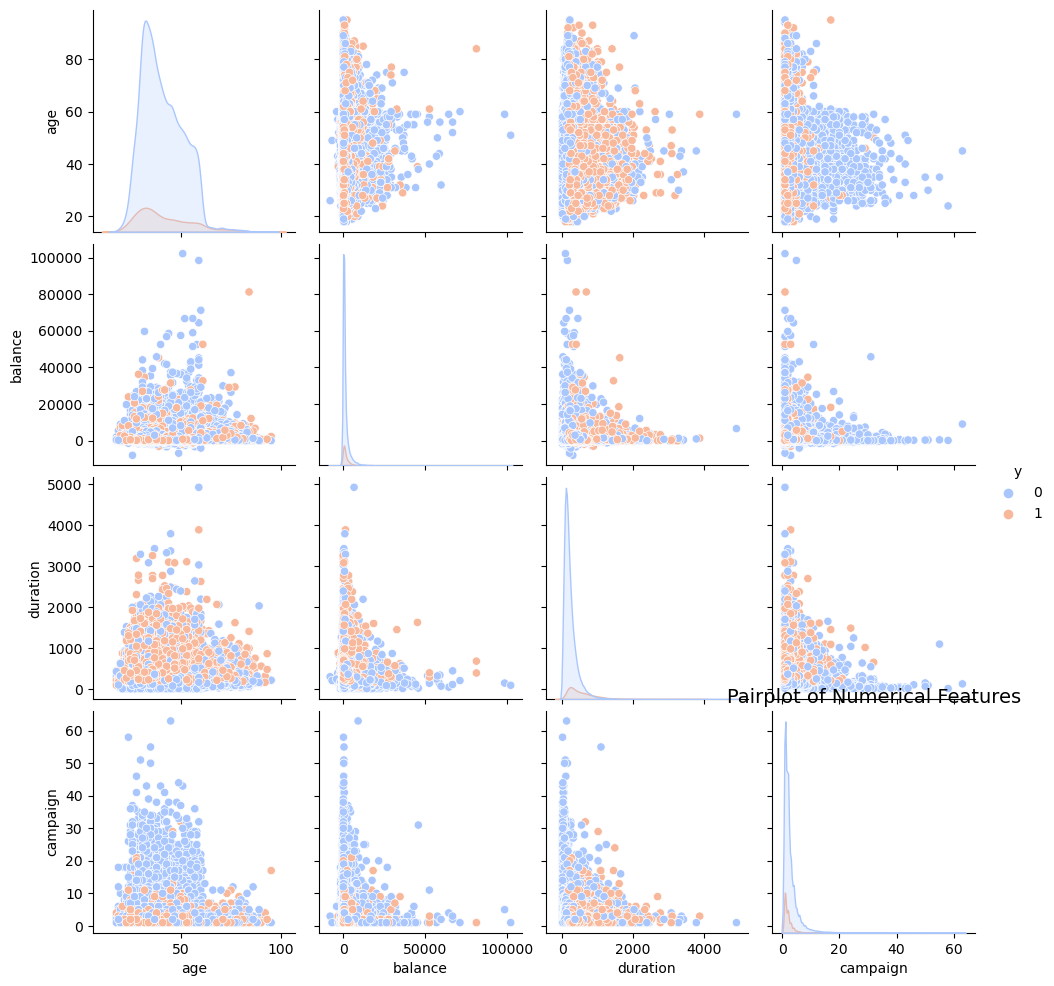

In [100]:
# Pairplot of numerical features, colored by the target variable `y`
sns.pairplot(df[['age', 'balance', 'duration', 'campaign', 'y']], hue='y', palette='coolwarm')
plt.title('Pairplot of Numerical Features', fontsize=14)
plt.show()
